In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<H2>Part 1 Building a ReLU neural network</H2>

<H4>The overall network</H4>

The network consists of:
1. 2 inputs
2. 1 hidden layer with 3 hidden units
3. 1-class output (for binary classication)

<img src="Network_Overall.png" alt="Network" style="width:auto;">

<h4>Mathematical equation for the output of this network:</h4>
<br>$y = sigmoid(v_1h_1 + v_2h_2 + v_3h_3 + c)$</br>
<br>$h_1 = ReLu(x_1w_{11} + x_2w_{21} + b1)$</br>
<br>$h_2 = ReLu(x_1w_{12} + x_2w_{22} + b2)$</br>
<br>$h_3 = ReLu(x_1w_{13} + x_2w_{23} + b3)$</br>

<br>Overall:</br>
<br>$y = sigmoid(v_{1}ReLu(x_1w_{11} + x_2w_{21} + b1) + v_{2}ReLu(x_1w_{12} + x_2w_{22} + b2) + v_{3}ReLu(x_1w_{13} + x_2w_{23} + b3) + c)$</br>

<h4>Forward-pass function (ReLu and Sigmoid Activation Function)</h4>


In [3]:
# ReLu Activation
def ff_nn_ReLu(x):
    return max(0, x)

# Sigmoid Activation
def sigmoid(x):
    return (1 / (1 + math.exp(-x)))

<H4>Class probabilities associated with the forward pass of each sample</H4>

$W^{(1)} = \begin{bmatrix} 
1 & -1 & 0 \\
0 & 0 & 5 
\end{bmatrix}$ 
$\quad$ 
$b^{(1)} = [0,0,1]^T$
$\quad$
$V = \begin{bmatrix} 
1  \\
0 \\
-1
\end{bmatrix}$
$\quad$
$c=[1]$
$\quad$
$X = \begin{bmatrix} 
1 & -1 \\
0 & -1 \\
0 & 1
\end{bmatrix}$

In [4]:
# Weight Matrix for hidden layer 1
W = np.array([[1, -1, 0],
              [0, 0, 0.5]])

# Bias Matrix for hidden layer 1
b = np.array([[0, 0, 1]])

# Weight Matrix for output layer
V = np.array([[1],
              [0],
              [-1]])

# Bias Matrix for output layer
c = np.array([[1]])

# Input X
X = np.array([[1, -1],
              [0, -1],
              [0, 1]])

In [5]:
# Calculation Part
# Get input of first hidden layer
h_in = np.dot(X, W) + b

# Get output of first hidden layer
h_out = []
for h_i in h_in:
    h_out.append(np.array((list(map(ff_nn_ReLu, h_i)))))
h_out = np.array(h_out)

# Get input for output layer
y_in = np.dot(h_out, V) + c 

# Get output for output layer
y_hat = []
for h_i in y_in:
    y_hat.append(np.array((list(map(sigmoid, h_i)))))
y_hat = np.array(y_hat)

In [6]:
print('The probabilities associated with the forward pass of each sample are:', y_hat[0][0], y_hat[1][0], "and", y_hat[2][0])

The probabilities associated with the forward pass of each sample are: 0.8175744761936437 0.6224593312018546 and 0.3775406687981454


<H2>Part 2 Gradient Descent</H2>

<br>Non-convex function of two variables:</br>
<br>$f(x,y) = (1 - x^3) + 100 * (y^2 - x)^2$</br>

<H4>Partial derivatives of f with respect to x and to y</H4>

<br>$\frac{df}{dx} = -3x^2 + 200x - 200y^2$</br>
<br>$\frac{df}{dy} = 400y(y^2 - x)$</br>

<H4>Contours visulization of this function</H4>

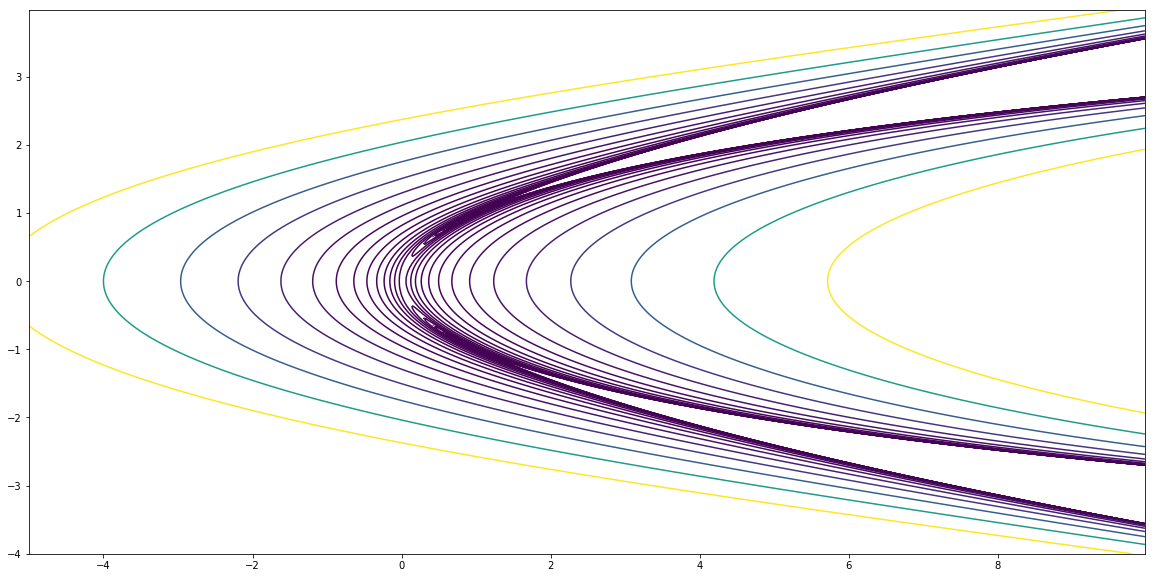

In [7]:
delta = 0.025
X, Y = np.meshgrid(np.arange(-5,10,delta), np.arange(-4,4, delta))
#Define function
rosenbrockfunction = lambda x,y: (1-x)**3 + 100*(y**2-x)**2
Z = rosenbrockfunction(X, Y)
plt.figure(figsize=(20,10))
plt.contour(X,Y,Z,np.logspace(-1.5,3.5,20,base=10))

<H4>Gradient Descent algorithm for finding the minimum of the function</H4>

In [8]:
# Calculate gradient respect to x and y of the function
def gradient(inputs):
    # Separate x and y
    x,y = inputs
    df_dx = -3*x**2 + 200*x - 200*y**2
    df_dy = 400*y*(y**2 - x)
    return np.array([df_dx, df_dy])

In [9]:
# Define gradient descent algorithms to find minimum values of gradient 
# based on number of iterations, learning rate and starting point
def gradient_descent(start, iteration, learning_rate):
    # Initialize the starting point
    cur_position = start
    track = [cur_position]
    
    for i in range(iteration):
        # Get current gradient
        cur_grad = gradient(cur_position)
        
        # Update based on learning rate
        cur_position = cur_position - learning_rate * cur_grad
        
        # Track the change
        track.append(cur_position)
    
    return np.array(track)

<H4>Visualization with starting point = [-4,0.5], iteration = 100 and learning rate = 0.001</H4>

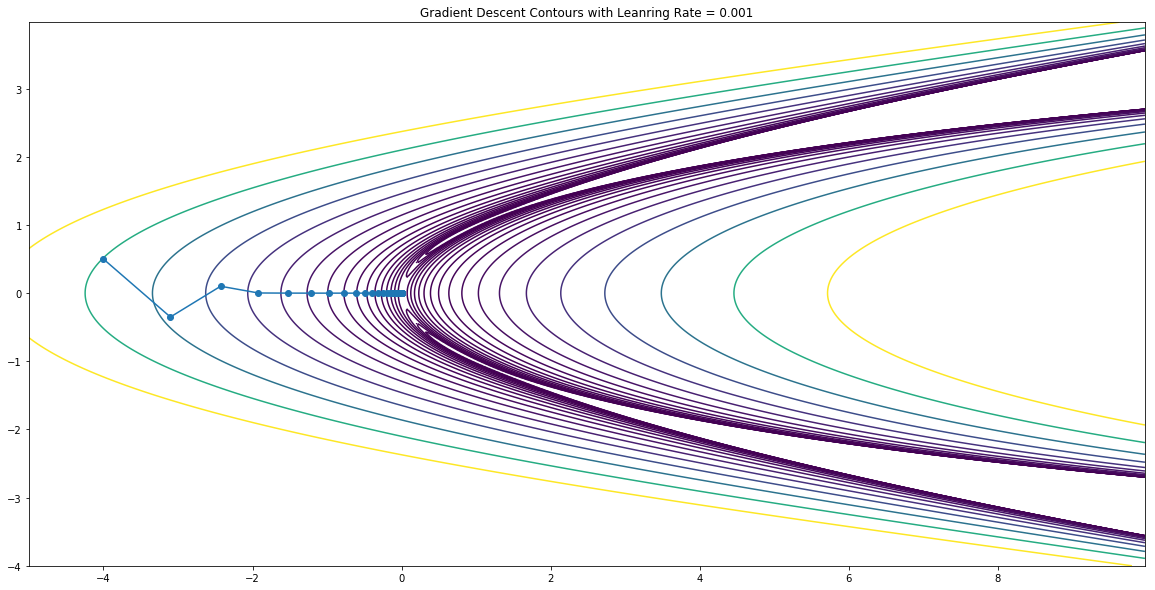

In [10]:
np.random.seed(10086)
traj = gradient_descent(iteration=100, learning_rate=0.001, start=[-4,0.5])

plt.figure(figsize=(20,10))
plt.title('Gradient Descent Contours with Leanring Rate = 0.001')
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

<H4>Visualization with starting point = [-4,0.5], iteration = 100 and learning rate = 0.0001</H4>

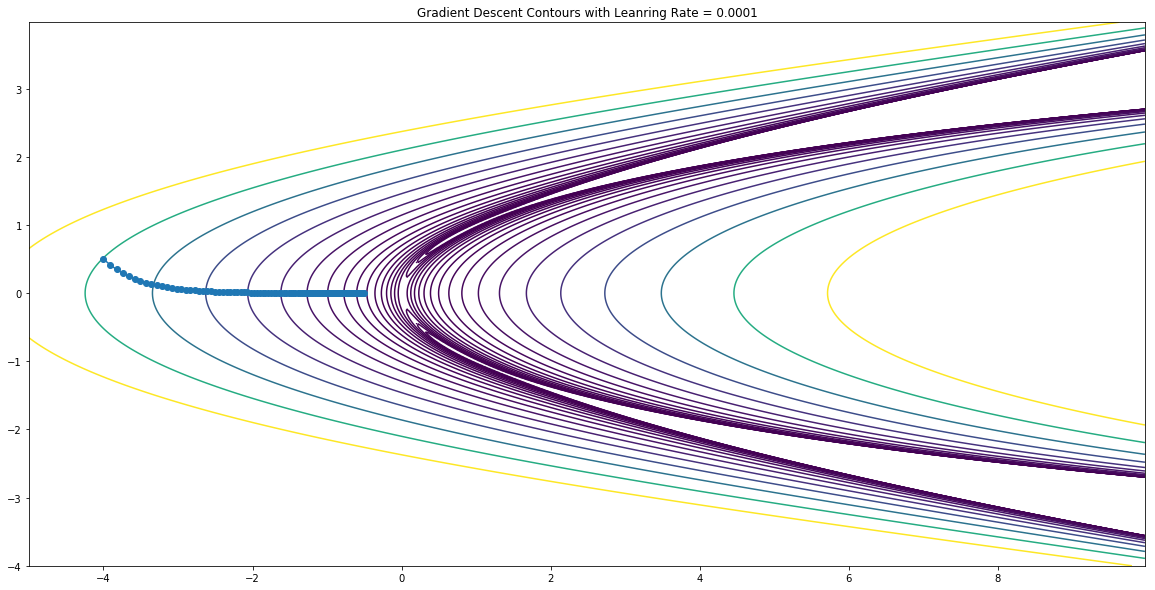

In [11]:
np.random.seed(10086)
traj = gradient_descent(iteration=100, learning_rate=0.0001, start=[-4,0.5])

plt.figure(figsize=(20,10))
plt.title('Gradient Descent Contours with Leanring Rate = 0.0001')
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

<H4>Visualization with starting point = [-4,0.5], iteration = 100 and learning rate = 0.00001</H4>

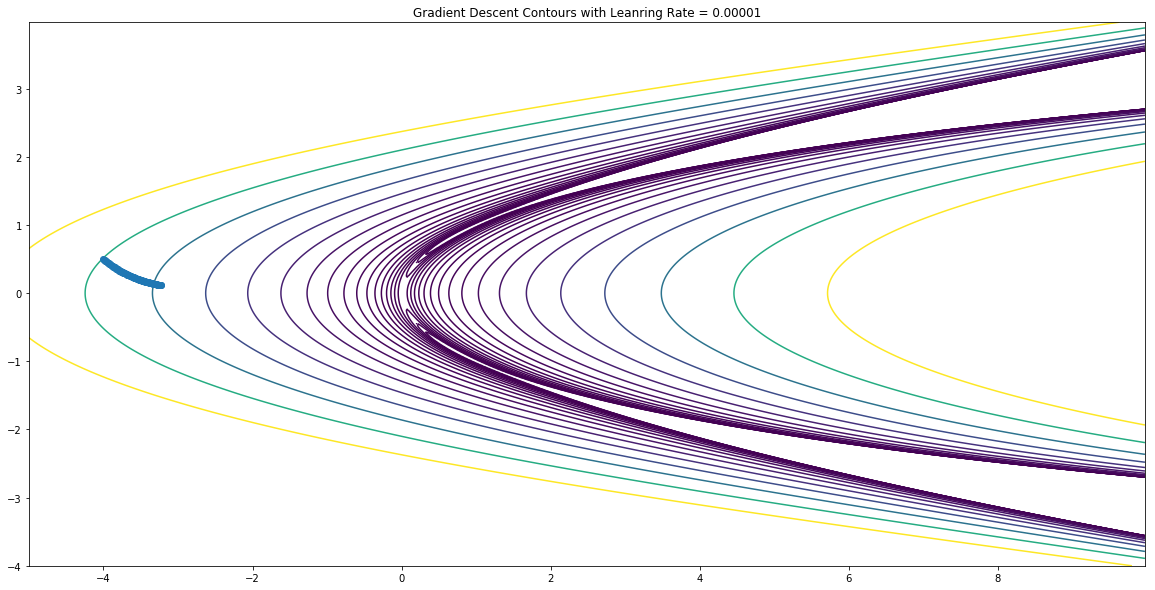

In [12]:
np.random.seed(10086)
traj = gradient_descent(iteration=100, learning_rate=0.00001, start=[-4,0.5])

plt.figure(figsize=(20,10))
plt.title('Gradient Descent Contours with Leanring Rate = 0.00001')
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

<H4>Gradient Descent algorithm With Momentum</H4>

In [13]:
# Define gradient descent algorithms + momentum to find minimum values of gradient 
# based on number of starting point, iterations, learning rate, momentum parameter(alpha), initial velocity(v)
def gradient_descent_momentum(start, iteration, learning_rate, alpha, v):
    # Initialize the starting point
    cur_position = start
    track = [cur_position]
    velocity = v
    
    for i in range(iteration):
        # Get current gradient
        cur_grad = gradient(cur_position)
        
        # Stopping Criteria (when gradient < +-0.001)
        if (abs(cur_grad[0] < 0.001 and abs(cur_grad[1]) < 0.001)):
            return np.array(track)
        
        # Get updated velocity
        velocity = alpha * velocity - learning_rate * cur_grad
        
        # Update point based on velocity
        cur_position = cur_position + velocity
        
        # Track the change
        track.append(cur_position)
    
    return np.array(track)

<H4>Visualization with starting point = [-4,0.5], iteration = 100 and learning rate = 0.001, momentum parameter = 0.5, initial velocity = [0,0]</H4>

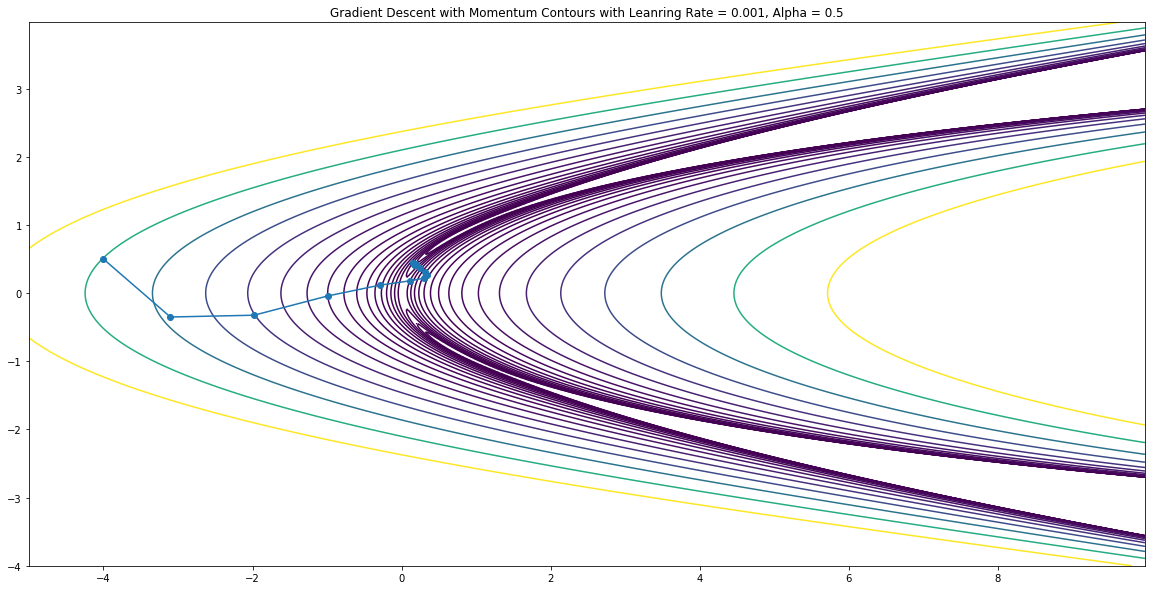

In [14]:
np.random.seed(10086)
traj = gradient_descent_momentum(iteration=100, learning_rate=0.001, start=[-4,0.5], alpha = 0.5, v = np.array([0,0]))

plt.figure(figsize=(20,10))
plt.title('Gradient Descent with Momentum Contours with Leanring Rate = 0.001, Alpha = 0.5')
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

<H4>Visualization with starting point = [-4,0.5], iteration = 100 and learning rate = 0.0001, momentum parameter = 0.5, initial velocity = [0,0]</H4>

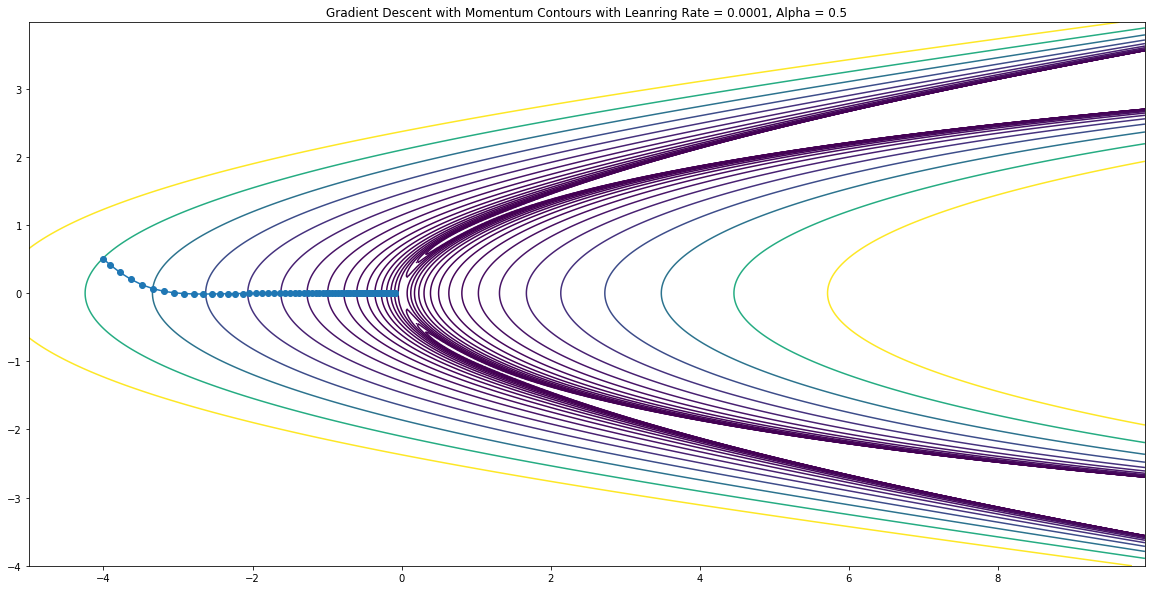

In [15]:
np.random.seed(10086)
traj = gradient_descent_momentum(iteration=100, learning_rate=0.0001, start=[-4,0.5], alpha = 0.5, v = np.array([0,0]))

plt.figure(figsize=(20,10))
plt.title('Gradient Descent with Momentum Contours with Leanring Rate = 0.0001, Alpha = 0.5')
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

<H4>Visualization with starting point = [-4,0.5], iteration = 100 and learning rate = 0.00001, momentum parameter = 0.9, initial velocity = [0,0]</H4>

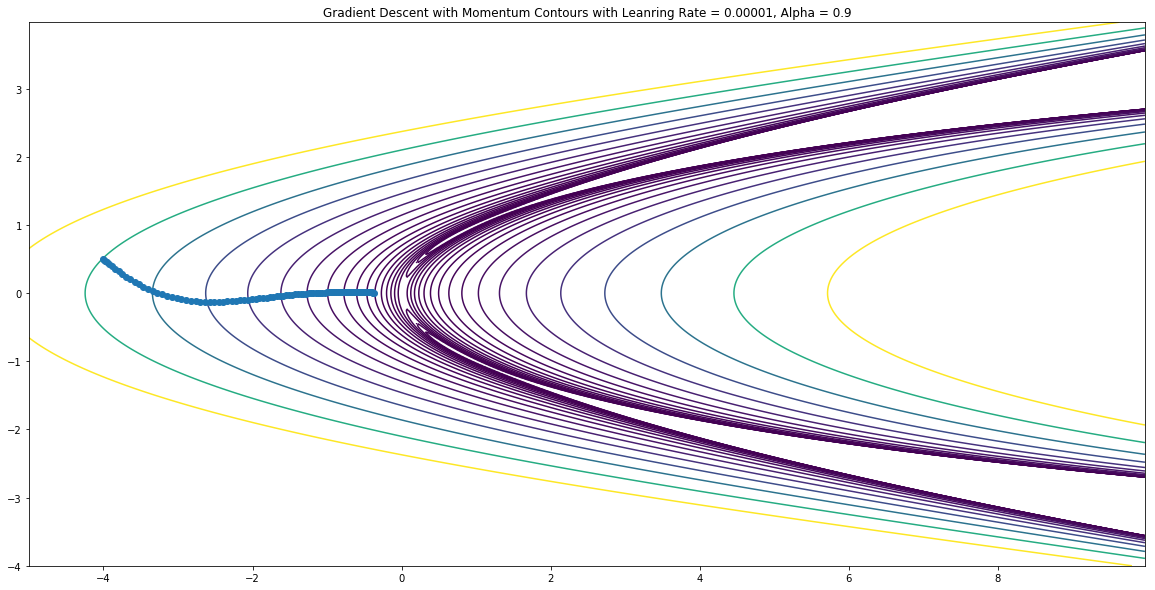

In [16]:
np.random.seed(10086)
traj = gradient_descent_momentum(iteration=100, learning_rate=0.00001, start=[-4,0.5], alpha = 0.9, v = np.array([0,0]))

plt.figure(figsize=(20,10))
plt.title('Gradient Descent with Momentum Contours with Leanring Rate = 0.00001, Alpha = 0.9')
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

<H2>Part 2 Gradient Descent</H2>

<H4>Gradient of the Loss function with respect to each of the model parameters</H4>

<br>$Loss = -y_i log(\hat{y}_i) - (1 - y_i)log(1 - \hat{y}_i)$</br>

<br>Loss respect to $\hat{Y}$ ($V_1, V_2, V_3, C$)</br>
<br>$\frac{dL}{dV_1} = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dV_1} = (\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}) * \hat{y_i} * (1 - \hat{y_i}) * h_1$</br>
<br>$\frac{dL}{dV_2} = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dV_2} = (\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}) * \hat{y_i} * (1 - \hat{y_i}) * h_2$</br>
<br>$\frac{dL}{dV_3} = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dV_3} = (\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}) * \hat{y_i} * (1 - \hat{y_i}) * h_3$</br>
<br>$\frac{dL}{dC} = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dC} = (\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}) * \hat{y_i} * (1 - \hat{y_i})$</br>

<br>Loss respect to H1 ($W_{11}, W_{21}, B_1$)</br>
<br>$\frac{dL}{dW_{11}} = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dh_1} * \frac{dh_1}{dW_{11}} = (\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}) * \hat{y_i} * (1 - \hat{y_i}) * V_{1} * \frac{d(ReLu(X_{1}W_{11} + X_{2}W_{21}+ b_1))}{d((X_{1}W_{11} + X_{2}W_{21}+ b_1))} * X_1$</br>
<br>$\frac{dL}{dW_{21}} = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dh_1} * \frac{dh_1}{dW_{11}} = (\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}) * \hat{y_i} * (1 - \hat{y_i}) * V_{1} * \frac{d(ReLu(X_{1}W_{11} + X_{2}W_{21}+ b_1))}{d((X_{1}W_{11} + X_{2}W_{21}+ b_1))} * X_2$</br>
<br>$\frac{dL}{db_1} = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dh_1} * \frac{dh_1}{db_1} = (\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}) * \hat{y_i} * (1 - \hat{y_i}) * V_{2} * \frac{d(ReLu(X_{1}W_{12} + X_{2}W_{22}+ b_2))}{d((X_{1}W_{12} + X_{2}W_{22}+ b_2))} * 1$</br>

<br>Loss respect to H2 ($W_{12}, W_{22}, B_2$)</br>
<br>$\frac{dL}{dW_{12}} = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dh_1} * \frac{dh_1}{dW_{12}} = (\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}) * \hat{y_i} * (1 - \hat{y_i}) * V_{2} * \frac{d(ReLu(X_{1}W_{12} + X_{2}W_{22}+ b_2))}{d((X_{1}W_{12} + X_{2}W_{22}+ b_2))} * X_1$</br>
<br>$\frac{dL}{dW_{22}} = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dh_1} * \frac{dh_1}{dW_{12}} = (\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}) * \hat{y_i} * (1 - \hat{y_i}) * V_{2} * \frac{d(ReLu(X_{1}W_{12} + X_{2}W_{22}+ b_2))}{d((X_{1}W_{12} + X_{2}W_{22}+ b_2))} * X_2$</br>
<br>$\frac{dL}{db_2} = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dh_1} * \frac{dh_1}{db_2} = (\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}) * \hat{y_i} * (1 - \hat{y_i}) * V_{2} * \frac{d(ReLu(X_{1}W_{12} + X_{2}W_{22}+ b_2))}{d((X_{1}W_{12} + X_{2}W_{22}+ b_2))} * 1$</br>



<br>Loss respect to H3 ($W_{13}, W_{23}, B_3$)</br>
<br>$\frac{dL}{dW_{13}} = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dh_1} * \frac{dh_1}{dW_{12}} = (\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}) * \hat{y_i} * (1 - \hat{y_i}) * V_{3} * \frac{d(ReLu(X_{1}W_{13} + X_{2}W_{23}+ b_3))}{d((X_{1}W_{13} + X_{2}W_{23}+ b_3))} * X_1$</br>
<br>$\frac{dL}{dW_{23}} = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dh_1} * \frac{dh_1}{dW_{12}} = (\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}) * \hat{y_i} * (1 - \hat{y_i}) * V_{3} * \frac{d(ReLu(X_{1}W_{13} + X_{2}W_{23}+ b_3))}{d((X_{1}W_{13} + X_{2}W_{23}+ b_3))} * X_2$</br>
<br>$\frac{dL}{db_3} = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dh_1} * \frac{dh_1}{db_3} = (\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}) * \hat{y_i} * (1 - \hat{y_i}) * V_{3} * \frac{d(ReLu(X_{1}W_{13} + X_{2}W_{23}+ b_3))}{d((X_{1}W_{13} + X_{2}W_{23}+ b_3))} * 1$</br>

<br>Before calculating the gradient of of loss for each parameter, functions such as gradient of different activation functions need to be defined</br>

In [17]:
# Gradient of sigmoid activation
def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Gradient of ReLu activation
def relu_grad(x):
    if x > 0:
        return 1
    else:
        return 0

<br>Overall Loss Function</br>
<br>$Loss = -y_i log(\hat{y}_i) - (1 - y_i)log(1 - \hat{y}_i)$</br>

In [18]:
def loss(y, y_hat):
    One = np.array([1] * len(y))
    return sum(-y * np.array(list(map(math.log,y_hat))) - (One - y) * np.array(list(map(math.log, One - y_hat))))

<br>Gradient function of $\hat{Y}$</br>
<br>$(\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}})$</br>

In [28]:
# Calculaye Y_hat from input x
def y_hat_fun(x,paramters):
    W,V,b,c = paramters
    h_in = np.dot(x,W) + b
    h_out = []
    for h in h_in:
        hi_list = []
        for hi in h:
            hi_list.append(ff_nn_ReLu(hi))
        h_out.append(hi_list)

    h_out = np.array(h_out)
    
    y_in = np.dot(h_out,V) + c
    y_hat = list(map(sigmoid, y_in))
    return y_hat

In [29]:
# Gradient of Y_hat Loss Function
def dL_dyhat(y,y_hat):
    One = np.array([1] * len(y))
    return (y / y_hat) - ((One - y)/(One - y_hat))

<H4>Gradient of the Loss at that specific location</H4>

In [36]:
# Gradient calculation that returns each weights' gradients (W, V, B and C)
def grad_f(x,paramters):
    W,V,b,c = paramters #Weights Parameter
    x1,x2 = x[:,0], x[:,1]
    One = np.array([1] * len(y))
    
    # Calculate Y_hat
    yhat = y_hat_fun(x,paramters)
    
    # Calculate H1, H2 and H3 from input x
    v1,v2,v3 = V
    h_in = np.dot(x,W) + b
    h = []
    for hs in h_in:
        one_sample = []
        for i in hs:
            one_sample.append(ff_nn_ReLu(i))
        h.append(one_sample)
    h = np.array(h)
    inh1,inh2,inh3 = h_in[:,0], h_in[:,1], h_in[:,2]
    h1, h2, h3 = h[:,0], h[:,1], h[:,2]
    
    # Gradient of V1, V2, V3 and C
    dL_dv1 = -np.average(dL_dyhat(y,yhat)*yhat*(One-yhat)*h1)
    dL_dv2 = -np.average(dL_dyhat(y,yhat)*yhat*(One-yhat)*h2)
    dL_dv3 = -np.average(dL_dyhat(y,yhat)*yhat*(One-yhat)*h3)
    dL_dc = -np.average(dL_dyhat(y,yhat)*yhat*(One-yhat))
    
    # Gradient of W11-W23 and B1-3
    dL_dw11 = -np.average(dL_dyhat(y,yhat)*yhat*(One-yhat)*v1*np.array(list(map(relu_grad, inh1)))*x1)
    dL_dw12 = -np.average(dL_dyhat(y,yhat)*yhat*(One-yhat)*v2*np.array(list(map(relu_grad, inh2)))*x1)
    dL_dw13 = -np.average(dL_dyhat(y,yhat)*yhat*(One-yhat)*v3*np.array(list(map(relu_grad, inh3)))*x1)
    dL_dw21 = -np.average(dL_dyhat(y,yhat)*yhat*(One-yhat)*v1*np.array(list(map(relu_grad, inh1)))*x2)
    dL_dw22 = -np.average(dL_dyhat(y,yhat)*yhat*(One-yhat)*v2*np.array(list(map(relu_grad, inh2)))*x2)
    dL_dw23 = -np.average(dL_dyhat(y,yhat)*yhat*(One-yhat)*v3*np.array(list(map(relu_grad, inh3)))*x2)
    dL_db1 = -np.average(dL_dyhat(y,yhat)*yhat*(One-yhat)*v1*np.array(list(map(relu_grad, inh1))))
    dL_db2 = -np.average(dL_dyhat(y,yhat)*yhat*(One-yhat)*v2*np.array(list(map(relu_grad, inh2))))
    dL_db3 = -np.average(dL_dyhat(y,yhat)*yhat*(One-yhat)*v3*np.array(list(map(relu_grad, inh3))))
    
    # Combine all gradients
    dL_dw = np.array([[dL_dw11,dL_dw12,dL_dw13],[dL_dw21,dL_dw22,dL_dw23]])
    dL_dv = np.array([dL_dv1,dL_dv2,dL_dv3])
    dL_db = np.array([dL_db1,dL_db2,dL_db3])

    return np.array([dL_dw, dL_dv, dL_db, dL_dc])

<H4>XOR Dataset</H4>
<br>Normally distributed with center (0,0) and range (-2,2) 2 binary classes XRO dataset</br>

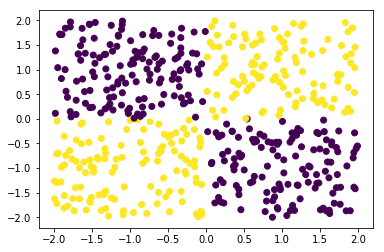

In [31]:
x=np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

<H4>Gradient Descent for XOR Dataset</H4>

In [47]:
# Define starting point (input x) and starting weightes vectors
starting_w = np.array([[1,-1,0],[0,0,0.5]])
starting_v = np.array([1,0,-1])
starting_b = np.array([0,0,1])
starting_c = [1]
weights = np.array([starting_w,starting_v,starting_b,starting_c])

# Define gradient descent algorithmsto find minimum values of gradient 
# based on number of starting point and weights, iterations and learning rate
def grad_descent(inputX, y, weights, iterations, learning_rate):
    x1, x2 = inputX[:,0], inputX[:,1]
    
    # Track the change of of weights
    trajectory = [weights] 
    
    # Track the change of losses
    losses = [loss(y, y_hat_fun(inputX, weights))]
    
    for i in range(iterations):
        grad = grad_f(inputX, weights) # Get gradient
        weights = weights - learning_rate * grad # Update gradient 
        trajectory.append(weights) 
        losses.append(loss(y, y_hat_fun(inputX,weights))) # Get the loss
    return (np.array(trajectory), losses)

Text(0.5, 1.0, 'Change of Loss for Gradient Descent')

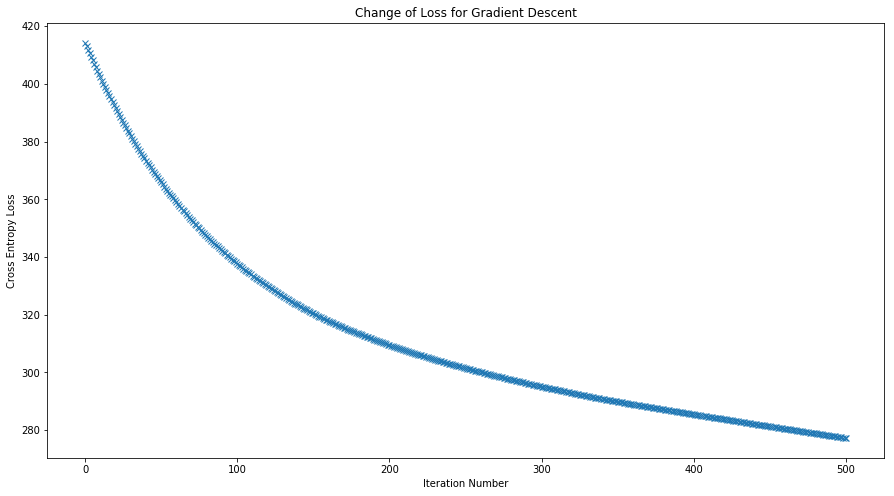

In [55]:
traj, losses = grad_descent(x, y, weights, iterations=500,learning_rate=0.01)
plt.figure(figsize=(15,8))
plt.plot(losses,'x')
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Iteration Number")
plt.title("Change of Loss for Gradient Descent")

<H4>Gradient Descent + Momentum for XOR Dataset</H4>

In [49]:
# Define starting point (input x) and starting weightes vectors
starting_w = np.array([[1,-1,0],[0,0,0.5]])
starting_v = np.array([1,0,-1])
starting_b = np.array([0,0,1])
starting_c = [1]
weights = np.array([starting_w,starting_v,starting_b,starting_c])

# Define gradient descent algorithms + momentum to find minimum values of gradient 
# based on number of starting point and weights, learning_rate, iterations, momentum parameter(alpha), initial velocity(v)
def grad_descent_momentum(inputX, y, weights, learning_rate, iterations, alpha, v):
    x1, x2 = inputX[:,0], inputX[:,1]
    
    # Track the change of of weights
    trajectory = [weights] 
    
    # Track the change of losses
    losses = [loss(y, y_hat_fun(inputX, weights))]
    
    # Initialize velocity
    velocity = v
    
    for i in range(iterations):
        # Get gradient
        grad = grad_f(inputX, weights) 
        
         # Get updated velocity
        velocity = alpha * velocity - learning_rate * grad
        
        # Update weights based on velocity
        weights = weights + velocity
        
        trajectory.append(weights) 
        losses.append(loss(y, y_hat_fun(inputX,weights))) # Get the loss
    return (np.array(trajectory), losses)

Text(0.5, 1.0, 'Change of Loss for Gradient Descent with Momentum')

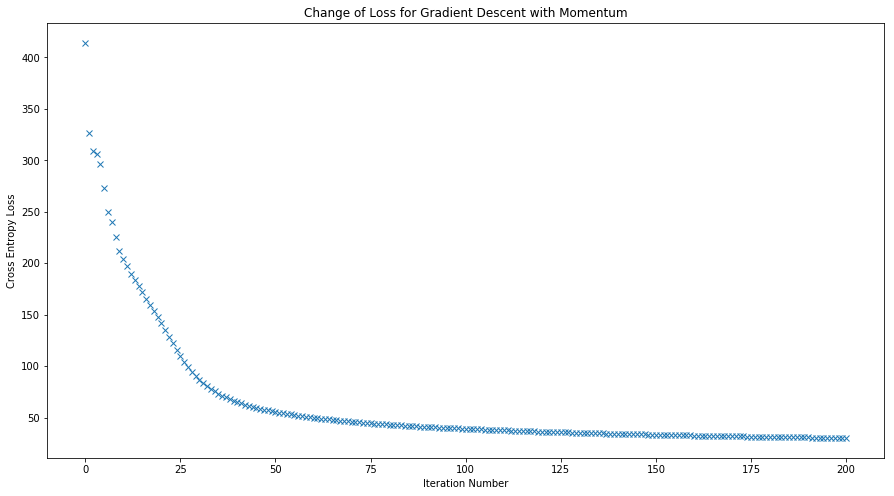

In [57]:
traj, losses = grad_descent_momentum(x, y, weights, learning_rate=1, iterations=200,alpha=0.7, v=0.01)
plt.figure(figsize=(15,8))
plt.plot(losses,'x')
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Iteration Number")
plt.title("Change of Loss for Gradient Descent with Momentum")

<br>As we can see, gradient descent with momentum tends to converge quicker than the one without momentum with increase of iterations. Cross entropy losses converges round 75 iterations with momentum whereas cross entropy losses are still decreasing for the one without momentum around 500 iterations.</br>

<h4>Predition Boundary for XOR Dataset</h4>
<br>Predict the labels after updating the weights parameters learned by gradient descent + momentum</br>

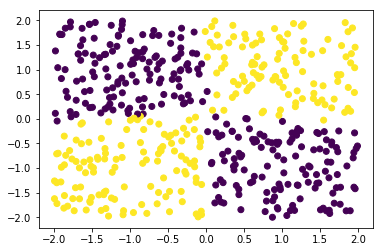

In [62]:
# Using updated weights vectors for prediction  
y_hat_pred = np.array(y_hat_fun(x,traj[200]))
y_hat_pred[y_hat_pred > 0.5] = 1
y_hat_pred[y_hat_pred < 0.5] = 0
plt.scatter(x[:,0],x[:,1],c=y_hat_pred)

<br>As we can see, after 200 iterations gradient descent with momentum, the prediction boundary is about the same as that of the initial XOR dataset.</br>